In [17]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# describing the model with differential equations
def deriv(y, t, N, alpha, beta, gamma, delta, epsilon):
    S, E, V, I, F, R = y     # Susceptible, Exposed, Vaccinated, Infected, Fatal, Recovered
    dSdt = -beta * S * I / N - epsilon(I) * S
    dEdt = beta * S * I / N - gamma * E - epsilon(I) * E
    dVdt = epsilon(I) * (S + E)
    dIdt = gamma * E - delta * I
    dFdt = alpha * I
    dRdt = delta * I + epsilon(I) * (S + E) - alpha * I
    return dSdt, dEdt, dVdt, dIdt, dFdt, dRdt

In [19]:
# describing the parameters
N =  1244                # population, (S + E + I + R + F = N)
beta = 2.5               # rate of infection
gamma = 1/7              # incubation period  
delta = 1/5              # rate of recovery
alpha = 0.01             # mortality rate

def epsilon(n):          # implementing vaccination when 10% of the population is infected
    if n > N * 0.1:
        return 0.1       # vaccine effectivity / percentage of S+E vaccinated
    else:
        return 0  

S0, E0, V0, I0, F0, R0 = N-1, 0, 0, 1, 0, 0  # initial conditions: one infected

In [20]:
t = np.linspace(0, 99, 100)     # grid of time points (in days)
y0 = S0, E0, V0, I0, F0, R0     # initial conditions vector

# integrate the SEIRFV equations over the time grid, t
ret = odeint(deriv, y0, t, args=(N, alpha, beta, gamma, delta, epsilon))
S, E, V, I, F, R = ret.T

In [21]:
def plotsir(t, S, E, V, I, F, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, V, 'purple', alpha=0.7, linewidth=2, label='Vaccinated')
  ax.plot(t, I, 'orange', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, F, 'r', alpha=0.7, linewidth=2, label='Fatal')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show()

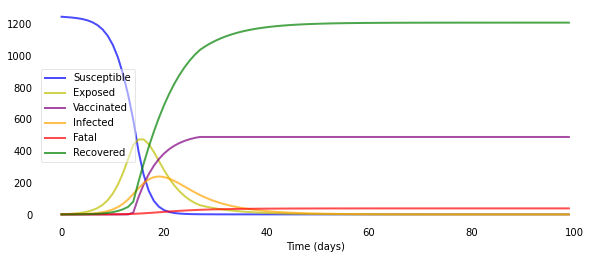

In [22]:
# plot the graph
plotsir(t, S, E, V, I, F, R)